In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import os
csv=[]
cleaned_labels_train1= ['cla_cla_tr','cla_pop_roc_tr','cla_jb_tr','cel_cla_tr','cel_pop_roc_tr','cel_jb_tr','flu_cla_tr','flu_cf_tr','flu_pop_roc_tr','flu_jb_tr','gac_cla_tr','gac_cf_tr','gac_pop_roc_tr','gac_jb_tr'
,'gel_cla_tr','gel_cf_tr','gel_pop_roc_tr','gel_jb_tr'
,'org_cf_tr','org_pop_roc_tr','org_jb_tr'
,'pia_cla_tr','pia_cf_tr','pia_pop_roc_tr','pia_jb_tr'
,'sax_cla_tr','sax_cf_tr','sax_pop_roc_tr','sax_jb_tr'
,'tru_cla_tr','tru_pop_roc_tr','tru_jb_tr'
,'vio_cla_tr','vio_cf_tr','vio_pop_roc_tr','vio_jb_tr'
,'voi_cf_tr','voi_pop_roc_tr','voi_jb_tr']
for i in range(len(cleaned_labels_train1)):
 csv.append(cleaned_labels_train1[i]+'.csv')


import pandas as pd
dfs=[]
for i in range(len(csv)):
  df=pd.read_csv(csv[i], header=None)
  num_rows = df.shape[0]
  num_col=df.shape[1]
  for j in range(len(cleaned_labels_train1)):
   if(cleaned_labels_train1[j] in csv[i]):
    column_name = f'{num_col}'
    df[column_name] = j

  dfs.append(df)
combined_df = pd.concat(dfs, ignore_index=True)
# Save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_data.csv', index=False)
import seaborn as sns




In [ ]:

last_column_index = -1
y_train = combined_df.iloc[:, last_column_index]
X_train = combined_df.iloc[:, :last_column_index]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#load file names from tarining set
def read_folder_contents(folder_path):
    # Check if the folder path exists
    if not os.path.exists(folder_path):
        print(f"The folder path '{folder_path}' does not exist.")
        return []

    # Initialize an empty list to store file names
    file_list = []

    # Recursively traverse the directory structure
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            file_list.append(os.path.join(root, file_name))

    return file_list
files_in_folder1 = read_folder_contents('/content/drive/MyDrive/Part1')
files_in_folder2=read_folder_contents('/content/drive/MyDrive/IRTestingData-Part2')
files_in_folder3=read_folder_contents('/content/drive/MyDrive/Part3')

files_in_folder_tests=files_in_folder1+files_in_folder2+files_in_folder3
#Annotation in test set for music genre (instruments already annotated)(training set already annotated)
song_name_genre=[["Hilary Hahnn_BWV 1042 - I. AllegroA","[cla]"],["Honky Cat","[pop_roc]"],
["Julian Bream - Albeniz- Mallorca, Opus 202","[cla]"],["Bert Jansch - Avocet","[cou_fol]"],["Jeff Beck - Hi-Ho Silver Lining","[pop_roc]"],
["15_more than a feeling - boston","[pop_roc]"],["Sur le fil","[cla]"],["Norbert Kraft - Julia Florida - S04E12","[cla]"],["arvo p_rt - alina - 01 - spiegel im spiegel","[cla]"],
["Debussy - Arabesque","[cla]"],["Debussy, Sonata for Cello & Piano - 1 Prologue","[cla]"],
["Debussy, Violin Sonata - 1 Allegro vivo","[cla]","edgar froese - epsilon in malaysian pale 1","[cla]"],
["Fingerstyle Guitar Magazine #47 - 01 - Liona Boyd - Carretera Libertad","[cou_fol]"],["Gesualdo - Io tacero","[cla]"],["gyorgy ligeti- atmospheres","[cla]"],
["harold budd - avalon sutra - 01 - arabesque 3","[cla]"],["James Galway - 'Pennywhistle Jig'","[cla]"],["Johnny Cash - One-","[cou_fol]"],["Leo Kottke - Leo Kottke - Ojo","[cou_fol]"],
["Mireille Mathieu & Ennio Morricone - 01 - Un Jour Tu Reviendras","[pop-roc]"],
["Philip Glass - Cello Octet Conjunto Ib_rico - Glass Reflections - 03 - Mishima","[cla]"],["satie - 1ere gymnopedie. lent et douloureux","[cla]"],["Schoenberg - Nacht","[cla]"],
["Segovia, Andre¦Βs - The Art Of Segovia (1 Of 2) - 01 - Recuerdos De La Alhambra, For Guitar-","[cla]"],["The Police - 01 - Synchronicity I","[pop_roc]"],
["Zamfir - The Lonely Shepherd - 01 - The Lonely Shepherd","[cla]"],["02 bwv 1068 air on g string","[cla]"],["03_fly like an eagle - steve miller","[pop_roc]"],
["03-I'll Be OK","[pop_roc]"],["05 - Gidon Kremer - Violin Concerto No. 5 In A Major, K. 219- Adagio - Gidon Kremer","[cla]"],
["05 - Sonata in A minor, Op. post. 143 D.784 - I. Allegro giusto","[cla]"],["05 achron - hebrew melody","[cla]"],
["05 Mendelssohn - Piano Concerto No. 2 - II. Adagio (molto sostenuto)","[cla]"],["06 - The partisan","[cou_fol]"],["08-Concerto in A major, K 219 -2- Adagio","[cla]"],
["10 - Johann Sebastian Bach - English Suite No. 3 in G major, BWV 808 (Andra¦Αs Schiff) (1)","[cla]"],["13 Chet Atkins & Jerry Reed - Sneakin' Around","[cou_fol]"],
["Don't Get Around Much Anymore","[jaz_blu]"] ,
["Good Vibrations","[pop_roc]"],["Just One Of Those Things","[jaz_blu]"],["Organ Grinder's Swing","[jaz_blu]"],["Volunteered Slavery","[jaz_blu]"],["Caravan","[jaz_blu]"],
["Flight Time- (pop-rock)","[jaz_blu]"],
["I Don't Worry About a Thing","[jaz_blu]"],["In The Crease","[jaz_blu]"],["It Don't Mean a Thing (If It Ain't Got That Swing)","[jaz_blu]"],
["The Best Of Wayne Shorter - The Blue Note Years - [Speak No Evil]","[jaz_blu]"],
["Offering","[jaz_blu]"],["Trouble (No. 2)","[jaz_blu]"],["sensing","[jaz_blu]"],["Time Remembered","[jaz_blu]"],["Hank's Other Bag","[jaz_blu]"],["Stranger On The Shore","[jaz_blu]"],["Chet Baker - Prayer For The Newborn","[jaz_blu]"],
["Da Duh Dah","[jaz_blu]"],["Roadgame","[jaz_blu]"],["So What","[jaz_blu]"],["Wee Baby Blues","[jaz_blu]"],["Blue Train","[jaz_blu]"],["Chuck Mangione_Feels So Good_Feels So Good","[jaz_blu]"],
["Inner City Blues (Makes Me Wanna Holler)","[jaz_blu]"],["Buck Clayton, Coleman Hawkins, Slam Stewart - Beyond The Blue Horizon (1944)","[jaz_blu]"],["Sonnysphere","[jaz_blu]"],["I_M_NOT_IN_LOVE","[pop_roc]"],["Fats Navarro - Boperation","[jaz_blu]"],
["jimmy_mcgriff-jumpin_the_blues","[jaz_blu]"],["Dave Douglas-The Jones","[jaz_blu]"],["Stuck On You rock pop","[jaz_blu]"],["The Ultimate Jazz Archive Set 08-Barney Bigard-401-Sugar","[jaz_blu]"],
["Toma Waits - Over the rainbow","[jaz_blu]"],["john_coltrane-01-a_love_supreme_part_1-rns","[jaz_blu]"],["Bobby Sox Blues","[jaz_blu]"],["ContinentalBlues45","[jaz_blu]"],["Debussy, Sonata for Violin & Piano - 1 Allegro vivo","[cla]"],
["Doc Watson - Doc Watson - Deep River Blues","[jaz_blu]"],["Jaga Jazzist - Mikado","[jaz_blu]"],["Jelly Roll Morton - Honky Tonk Blues","[jaz_blu]"],["Papa John Creach - Papa Blues - 01 - Sweet Life Blues","[jaz_blu]"],
["Mira - ANDREW HILL","[jaz_blu]"],["Lost Life","[jaz_blu]"],["Confirmation","[jaz_blu]"],["Buddy DeFranco & Tommy Gumina - Scrapple from the Apple","[jaz_blu]"],
["What'll I Do - Bud Shank And Bob","[jaz_blu]"],["Living in the Past","[jaz_blu]"],
["Boots Randolph - Yakety Sax","[jaz_blu]"],["Stardust","[jaz_blu]"],["entangled- pop-roc","[jaz_blu]"],["School Boy","[jaz_blu]"],["Yesterdays","[jaz_blu]"],
["LEE MORGAN - THE SIDEWINDER","[jaz_blu]"]
]

files_in_folder1 = read_folder_contents('/content/drive/MyDrive/Part1')
files_in_folder2=read_folder_contents('/content/drive/MyDrive/IRTestingData-Part2')
files_in_folder3=read_folder_contents('/content/drive/MyDrive/Part3')

files_in_folder_tests=files_in_folder1+files_in_folder2+files_in_folder3
files_tests_final=[]
song_names_tests = []
song_genres_tests=[]
for row in song_name_genre:
    song_names_tests.append(row[0])
for column in song_name_genre:
  song_genres_tests.append(column[1])
for i in range(len(files_in_folder_tests)-1):
  for j in range(len(song_names_tests)-1):
    if (song_names_tests[j] in files_in_folder_tests[i]) and (".txt" in files_in_folder_tests[i]):
      files_tests_final.append(files_in_folder_tests[i])
print("The precent of test set to total data: ",len(files_tests_final)*100/(X_train.shape[0]+len(files_tests_final)))
X_train.shape[0]/len(files_tests_final)

Mounted at /content/drive
The precent of test set to total data:  6.888010540184453


13.517980107115532

In [ ]:
len(files_tests_final)

1307

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
scaler = MinMaxScaler()
X_trainsc = scaler.fit_transform(X_train.to_numpy())
X_train = pd.DataFrame(X_trainsc, columns=X_train.columns)

In [ ]:
print(X_train)

            0         1         2         3         4         5         6    \
0      0.054249  0.492166  0.961317  0.072503  0.146858  0.011352  0.144173   
1      0.261674  0.391543  0.972610  0.811781  0.697890  0.285693  0.008574   
2      0.056372  0.258146  0.753834  0.070498  0.111471  0.029426  0.306167   
3      0.323345  0.197651  0.817666  0.759255  0.701765  0.286356  0.036246   
4      0.047308  0.508946  0.944148  0.085383  0.187908  0.006436  0.159411   
...         ...       ...       ...       ...       ...       ...       ...   
17663  0.087020  0.186316  0.834505  0.185673  0.274188  0.082419  0.123405   
17664  0.087020  0.186316  0.834505  0.185673  0.274188  0.082419  0.123405   
17665  0.087020  0.186316  0.834505  0.185673  0.274188  0.082419  0.123405   
17666  0.087020  0.186316  0.834505  0.185673  0.274188  0.082419  0.123405   
17667  0.087020  0.186316  0.834505  0.185673  0.274188  0.082419  0.123405   

            7         8         9    ...       128 

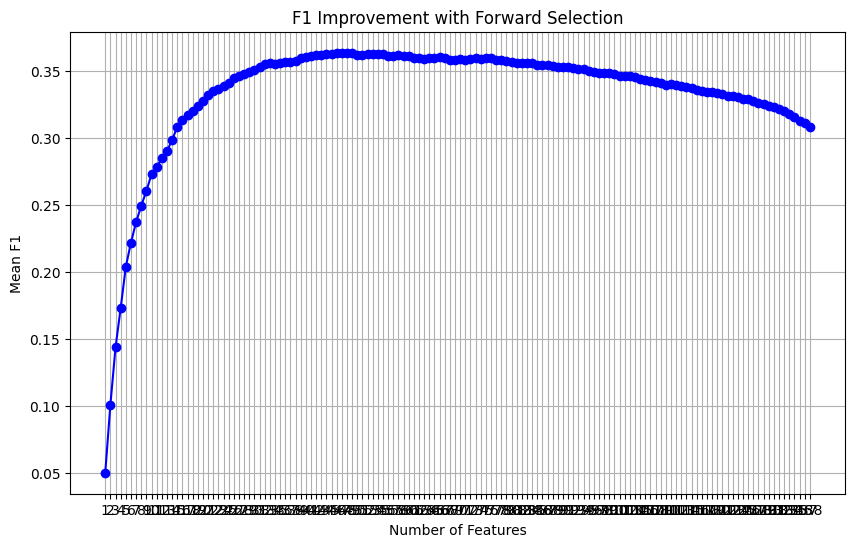

Selected features: [11, 9, 78, 13, 10, 110, 103, 85, 12, 19, 73, 100, 16, 4, 14, 15, 118, 30, 131, 33, 88, 17, 8, 81, 18, 92, 20, 121, 105, 49, 44, 54, 64, 52, 31, 95, 77, 80, 5, 23, 136, 53, 45, 137, 63, 36, 47, 51, 46, 94, 132, 1, 117, 50, 67, 72, 128, 126, 37, 122, 35, 87, 48, 43, 61, 55, 119, 56, 42, 71, 133, 82, 84, 65, 127, 2, 38, 34, 27, 69, 68, 29, 106, 125, 86, 130, 98, 57, 70, 124, 89, 134, 3, 115, 135, 79, 83, 0, 120, 112, 58, 26, 104, 113, 40, 114, 97, 99, 21, 66, 60, 96, 101, 111, 76, 59, 123, 39, 129, 116, 32, 7, 24, 107, 91, 22, 90, 62, 102, 108, 93, 25, 6, 28, 41, 74, 75, 109]
Best F1: 0.3637838104283412


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.metrics import make_scorer, f1_score
# Load your dataset
# Assume X contains features and y contains labels

# Define the number of folds for cross-validation
k = 13

# Create a k-fold cross-validation splitter
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize an empty set to store the selected features
selected_features = []
accuracies = []

# Create a list of available feature indices
num_features = X_train.shape[1]
available_feature_indices = set(range(num_features))

#the performance is counted using F1 metric
scorer = make_scorer(f1_score, average='weighted')
# Perform forward selection with k-fold cross-validation
for _ in range(num_features):
    best_feature_index = None
    best_F1 = 0.0
    for feature_index in available_feature_indices:
        # Try adding the current feature to the selected set
        candidate_features = selected_features + [feature_index]

        # Perform k-fold cross-validation with Naive Bayes classifier
        clf = GaussianNB()
        scores = cross_val_score(clf, X_train.iloc[:, candidate_features], y_train, cv=kf,scoring=scorer)
        F1 = np.mean(scores)

        # Update the best feature if accuracy improves
        if F1 > best_F1:
            best_F1 = F1
            best_feature_index = feature_index

    # Add the best feature to the selected set
    if best_feature_index is not None:
        selected_features.append(best_feature_index)
        available_feature_indices.remove(best_feature_index)
        accuracies.append(best_F1)
    else:
        break

# Plot how accuracy increases with each new feature
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', color='b', linestyle='-')
plt.title('F1 Improvement with Forward Selection')
plt.xlabel('Number of Features')
plt.ylabel('Mean F1')
plt.grid(True)
plt.xticks(range(1, len(accuracies) + 1))
plt.show()

print("Selected features:", selected_features)
print("Best F1:", max(accuracies))

In [ ]:
pip install pyAudioAnalysis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 MB 22.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyAudioAnalysis: filename=pyAudioAnalysis-0.3.14-py3-none-any.whl size=41264371 sha256=28a4f16ced94fb7d0ddff85e00048aab9833226e89787ae52e950b57ed70907d
  Stored in directory: /root/.cache/pip/wheels/a7/54/73/fa830689c2440d2c81ff175c60e374930ad1607a8881e0f43f
Successfully built pyAudioAnalysis


In [ ]:
pip install pydub

In [ ]:
pip install eyed3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 kB 19.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#load file names from tarining set
def read_folder_contents(folder_path):
    # Check if the folder path exists
    if not os.path.exists(folder_path):
        print(f"The folder path '{folder_path}' does not exist.")
        return []

    # Initialize an empty list to store file names
    file_list = []

    # Recursively traverse the directory structure
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            file_list.append(os.path.join(root, file_name))

    return file_list
directory_names = ['cla_cla_tr','cla_pop_roc_tr','cla_jb_tr','cel_cla_tr','cel_pop_roc_tr','cel_jb_tr','flu_cla_tr','flu_cf_tr','flu_pop_roc_tr','flu_jb_tr','gac_cla_tr','gac_cf_tr','gac_pop_roc_tr','gac_jb_tr'
,'gel_cla_tr','gel_cf_tr','gel_pop_roc_tr','gel_jb_tr'
,'org_cf_tr','org_pop_roc_tr','org_jb_tr'
,'pia_cla_tr','pia_cf_tr','pia_pop_roc_tr','pia_jb_tr'
,'sax_cla_tr','sax_cf_tr','sax_pop_roc_tr','sax_jb_tr'
,'tru_cla_tr','tru_pop_roc_tr','tru_jb_tr'
,'vio_cla_tr','vio_cf_tr','vio_pop_roc_tr','vio_jb_tr'
,'voi_cf_tr','voi_pop_roc_tr','voi_jb_tr']
dirt=[]
for i in directory_names:
 dirt.append(('/content/drive/MyDrive/test'+"/"+i))

from pyAudioAnalysis import MidTermFeatures as aF
import os
import numpy as np
import plotly.graph_objs as go
import plotly

class_names = [os.path.basename(d) for d in dirt]
m_win, m_step, s_win, s_step = 1, 1, 0.1, 0.05

# segment-level feature extraction:
features = []
for d in dirt: # get feature matrix for each directory (class)
    f, files, fn = aF.directory_feature_extraction(d, m_win, m_step,
                                                   s_win, s_step)
    features.append(f)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Analyzing file 1 of 35: /content/drive/MyDrive/test/cla_cla_tr/08-Concerto in A major, K 219 -2- Adagio-14.wav
Analyzing file 2 of 35: /content/drive/MyDrive/test/cla_cla_tr/08-Concerto in A major, K 219 -2- Adagio-19.wav
Analyzing file 3 of 35: /content/drive/MyDrive/test/cla_cla_tr/08-Concerto in A major, K 219 -2- Adagio-21.wav
Analyzing file 4 of 35: /content/drive/MyDrive/test/cla_cla_tr/08-Concerto in A major, K 219 -2- Adagio-24.wav
Analyzing file 5 of 35: /content/drive/MyDrive/test/cla_cla_tr/08-Concerto in A major, K 219 -2- Adagio-26.wav
Analyzing file 6 of 35: /content/drive/MyDrive/test/cla_cla_tr/08-Concerto in A major, K 219 -2- Adagio-29.wav
Analyzing file 7 of 35: /content/drive/MyDrive/test/cla_cla_tr/08-Concerto in A major, K 219 -2- Adagio-3.wav
Analyzing file 8 of 35: /content/drive/MyDrive/test/cla_cla_tr/08-Concerto in A major, K 219 -2

In [ ]:

import csv
file_name=[]
# Define the file name
for i in directory_names:
 file_name.append(i+"ts.csv")
q=1
for j in range(len(file_name)):
# Writing the list  a CSV file
      if features[j].any():
        print(file_name[j])
        np.savetxt(file_name[j], features[j], delimiter=",")
        print(q)
        q=q+1

cla_cla_trts.csv
1
cla_jb_trts.csv
2
cel_cla_trts.csv
3
cel_pop_roc_trts.csv
4
cel_jb_trts.csv
5
flu_cla_trts.csv
6
flu_cf_trts.csv
7
flu_pop_roc_trts.csv
8
flu_jb_trts.csv
9
gac_cla_trts.csv
10
gac_cf_trts.csv
11
gac_pop_roc_trts.csv
12
gac_jb_trts.csv
13
gel_cf_trts.csv
14
gel_pop_roc_trts.csv
15
gel_jb_trts.csv
16
org_pop_roc_trts.csv
17
org_jb_trts.csv
18
pia_cla_trts.csv
19
pia_pop_roc_trts.csv
20
pia_jb_trts.csv
21
sax_jb_trts.csv
22
tru_jb_trts.csv
23
vio_cla_trts.csv
24
voi_pop_roc_trts.csv
25
voi_jb_trts.csv
26


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy: 0.08352490421455938
F1 Score: 0.05371121339608605


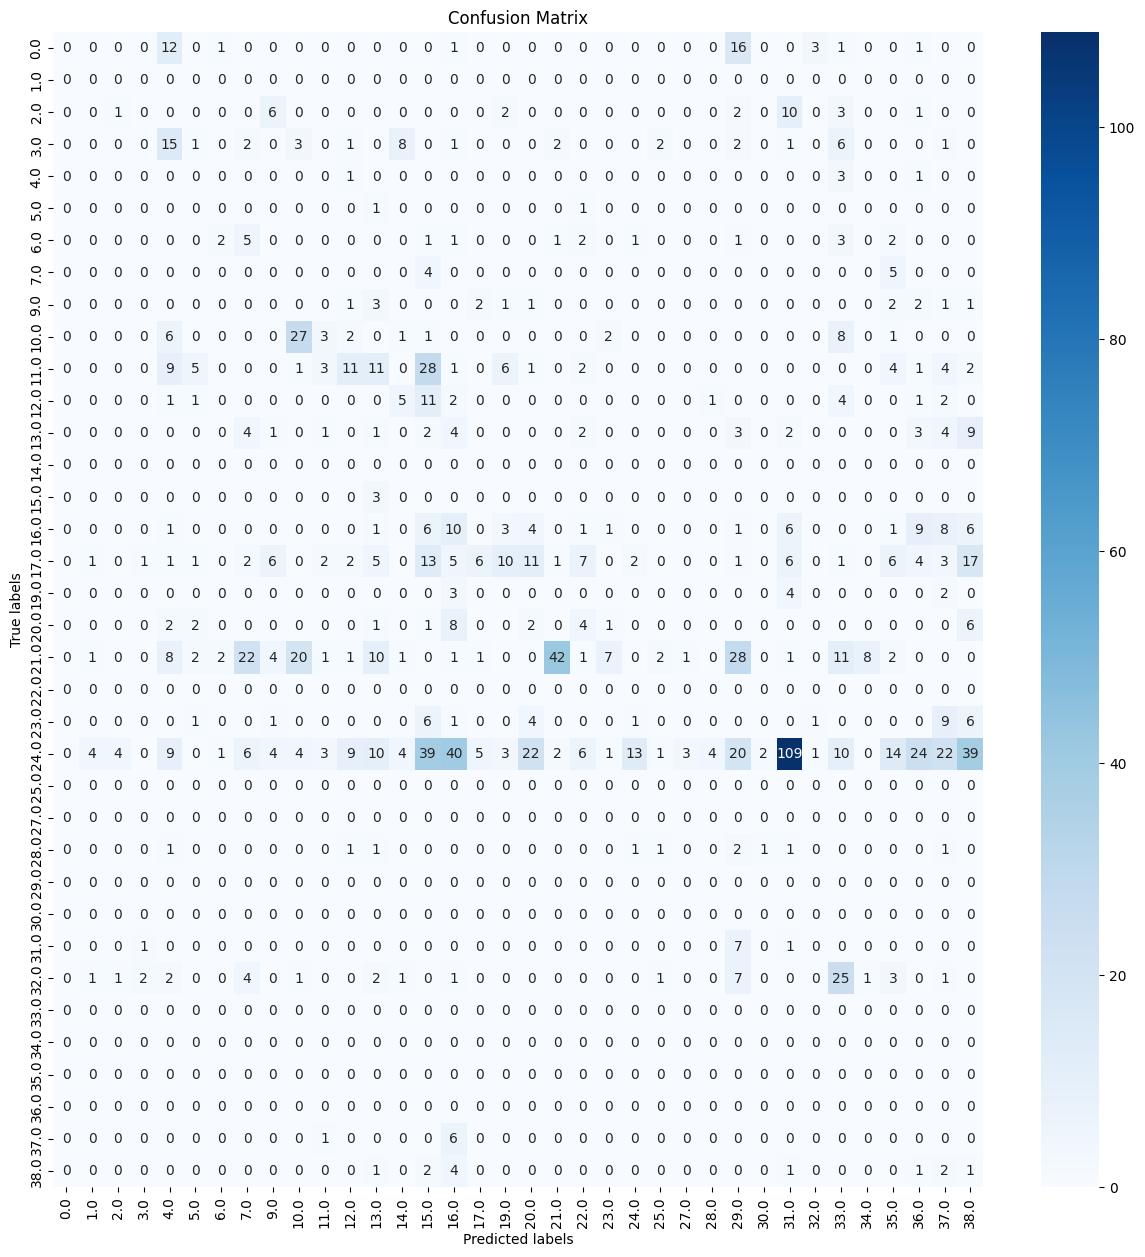

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from sklearn.naive_bayes import GaussianNB
selected_features=[11, 9, 78, 13, 10, 110, 103, 85, 12, 19, 73, 100, 16, 4, 14, 15, 118, 30, 131, 33, 88, 17, 8, 81, 18, 92, 20, 121, 105, 49, 44,
                   54, 64, 52, 31, 95, 77, 80, 5, 23, 136, 53, 45, 137, 63, 36, 47, 51, 46, 94, 132, 1, 117, 50, 67, 72, 128, 126, 37, 122, 35, 87, 48,
                   43, 61, 55, 119, 56, 42, 71, 133, 82, 84, 65, 127, 2, 38, 34, 27, 69, 68, 29, 106, 125, 86, 130, 98, 57, 70, 124, 89, 134, 3, 115, 135,
                   79, 83, 0, 120, 112, 58, 26, 104, 113, 40, 114, 97, 99, 21, 66, 60, 96, 101, 111, 76, 59, 123, 39, 129, 116, 32, 7, 24, 107, 91, 22, 90,
                   62, 102, 108, 93, 25, 6, 28, 41, 74, 75, 109]

newX_train=X_train.iloc[:, selected_features]
# Build a Gaussian Classifier
model = GaussianNB()
# Model training
model.fit(newX_train, y_train)

directory_names = ['cla_cla_tr','cla_pop_roc_tr','cla_jb_tr','cel_cla_tr','cel_pop_roc_tr','cel_jb_tr','flu_cla_tr','flu_cf_tr','flu_pop_roc_tr','flu_jb_tr','gac_cla_tr','gac_cf_tr','gac_pop_roc_tr','gac_jb_tr'
,'gel_cla_tr','gel_cf_tr','gel_pop_roc_tr','gel_jb_tr'
,'org_cf_tr','org_pop_roc_tr','org_jb_tr'
,'pia_cla_tr','pia_cf_tr','pia_pop_roc_tr','pia_jb_tr'
,'sax_cla_tr','sax_cf_tr','sax_pop_roc_tr','sax_jb_tr'
,'tru_cla_tr','tru_pop_roc_tr','tru_jb_tr'
,'vio_cla_tr','vio_cf_tr','vio_pop_roc_tr','vio_jb_tr'
,'voi_cf_tr','voi_pop_roc_tr','voi_jb_tr']

import csv
from pathlib import Path
file_name=[]
# Define the file name
for i in directory_names:
 file_name.append(i+"ts.csv")

import pandas as pd
dfs=[]
for i in range(len(file_name)):
  if (Path("/content/"+file_name[i])).exists():
   df=pd.read_csv(file_name[i], header=None)
   num_rows = df.shape[0]
   num_col=df.shape[1]
   for j in range(len(cleaned_labels_train1)):
    if(cleaned_labels_train1[j] in file_name[i]):
     column_name = f'{num_col}'
     df[column_name] = j

   dfs.append(df)
test_df = pd.concat(dfs, ignore_index=True)
test_df=test_df.iloc[:, :-1]
test_df=test_df.dropna()
last_column_index = -1
y_test = test_df.iloc[:, last_column_index]
X_test = test_df.iloc[:, :last_column_index]
X_testsc = scaler.transform(X_test.to_numpy())
X_test = pd.DataFrame(X_testsc, columns=X_train.columns)
newX_test=X_test.iloc[:, selected_features]
# Predict Output

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(newX_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

labels = np.unique(np.concatenate((y_test, y_pred)))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot confusion matrix as an image
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
cm = confusion_matrix(y_test, y_pred)



In [ ]:
# Predict labels on the training data
y_train_pred = model.predict(newX_train)

# Calculate accuracy on the training data
accuracy = accuracy_score(y_train, y_train_pred)

print("Accuracy on training data:", accuracy)

Accuracy on training data: 0.34203079012904686
